In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

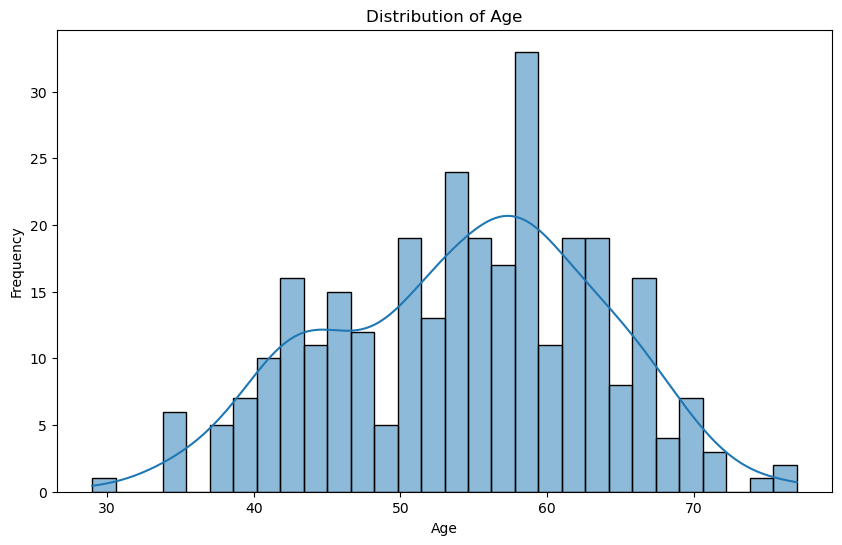

In [2]:

# Load your dataset
data = pd.read_csv('/Users/mobin/Desktop/archive/heart.csv')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [4]:


# Define the feature columns and target variable
features = data.columns[:-1]
target = 'output'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Creating a column transformer for handling categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [5]:
# Define the model with L1 regularization
model = SGDClassifier(penalty='l1', alpha=2.0, random_state=42)

# Creating a pipeline that first preprocesses the data and then applies the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Extracting TP, FP, FN, TN
tn, fp, fn, tp = conf_matrix.ravel()

print(tn, fp, fn, tp, conf_matrix_df)

29 0 32 0                Predicted Negative  Predicted Positive
True Negative                  29                   0
True Positive                  32                   0
